In [1]:
import numpy as np
import pandas as pd
import sklearn as sl

## Лабораторная работа по машинному обучению
Был выбран следующий датасет:
Fifa 19 complete player dataset
https://www.kaggle.com/karangadiya/fifa19

Выбор мотивирован приемлемым количеством объектом и большим числом признаков.

В данном датасете присутствуют числовые физические показатели (от 0 до 100), качественный признак относительно показателей игры (атака и защита), бинарный признак предпочитаемой ноги при ударе и финансовые показатели в типе string с ценой и заплатой игроков.

Далее будет производится подготовка данных и последующий анализ игроков с целью классификации итоговой стоимости, основываясь на физических и рейтинговых показателях.

In [2]:
data = pd.read_csv('fifa19/data.csv')
data.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Как можно заметить: не во всех признаках содержится полная информация о всех игроках, следовательно, либо необходимо сократить датасет до приемлемого количества объектов, основываясь на важные признаки, либо удалить поля, которые (на данный момент из логических соображений) не влияют на итоговую стоимость игрока

In [4]:
data_prep = data.drop(columns=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'])
data_prep.shape

(18207, 63)

### Нам не важен рейтинг игрока на каждой позиции, так как есть признак Position, который определяет его тип игры, а во вторых - мы теряем достаточное количество данных, если выкинем всех, у кого отсутствует данный рейтинг

In [5]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 63 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Также не будут являтся значимыми следующие колонки: 
Release Clause - как я понял, это стоимость выкупа игрока из команды (гораздо выше рыночной стоимости), 

Photo, 

Nationality, 

Flag, 

Club Logo, 

Wage - зарпалата в клубе, 

Body type - так как там есть выбросы, и этот показатель влияет на физические показатели, которые уже подсчитаны, 
то есть на итоговую стоимость он не влияет

Real face,

Jersey number - номер игрока в команде (не идентифицирует капитана, как, например, в баксетболе),

Joined - дата присоединения к клубу,

Loaned from - из какого клуба пришел (или был куплен),

Contract Valid Until - когда заканчивается действие контракта,

Height, Weight - аналогично с body type,

Special - неизвестная величина,

ID, Name - тоже выбрасываем.

In [6]:
data_prep.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [7]:
data_prep = data_prep.drop(columns=['ID', 'Name','Photo', 'Nationality', 'Flag','Club Logo','Wage', 'Special','Body Type', 'Real Face','Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until','Height', 'Weight'])

In [8]:
data_prep = data_prep.drop(columns=['Release Clause'])

In [9]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   Age                       18207 non-null  int64  
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Value                     18207 non-null  object 
 6   Preferred Foot            18159 non-null  object 
 7   International Reputation  18159 non-null  float64
 8   Weak Foot                 18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Work Rate                 18159 non-null  object 
 11  Position                  18147 non-null  object 
 12  Crossing                  18159 non-null  float64
 13  Finishing                 18159 non-null  float64
 14  Headin

## У нас есть уже много признаков, которые подходят для работы (по типу данных), однако еще есть объекты, которые надо заменить на числовые признаки

Помимо этого есть еще небольшая проблема: не у всех объектов описаны все признаки, поэтому необходимо сделать dropna

Также в колонке клуба - очень большой разброс значений - более 650 клубов, однако, эмпирически кажется, что клуб - важный фактор для итоговой стоимости, мы позже его исследуем, коррелирует с ним стоимость, а после обучения модели узнаем, насколько значимым являлся признак

Сейчас рассмотрим все Series'ы, которые являются объектами

In [10]:
data_prep = data_prep.dropna()

In [11]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17918 non-null  int64  
 1   Age                       17918 non-null  int64  
 2   Overall                   17918 non-null  int64  
 3   Potential                 17918 non-null  int64  
 4   Club                      17918 non-null  object 
 5   Value                     17918 non-null  object 
 6   Preferred Foot            17918 non-null  object 
 7   International Reputation  17918 non-null  float64
 8   Weak Foot                 17918 non-null  float64
 9   Skill Moves               17918 non-null  float64
 10  Work Rate                 17918 non-null  object 
 11  Position                  17918 non-null  object 
 12  Crossing                  17918 non-null  float64
 13  Finishing                 17918 non-null  float64
 14  Headin

## Теперь в каждом объекте признаки дают полное описание, и размер выборки сократился всего на ~300 значений

In [12]:
data_prep['Club'].unique().shape

(651,)

In [13]:
data_prep['Preferred Foot'].unique().shape

(2,)

In [14]:
data_prep['Work Rate'].unique().shape

(9,)

In [15]:
data_prep['Position'].unique().shape

(27,)

## Получили один бинарный признак и 3 числовых

Заменим категориальные признаки на числовые

Далее мы создадим два экземпляра выборки: с клубом и без

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
le.fit(data_prep.Club)
data_prep['Club'] = le.transform(data_prep.Club)

In [18]:
le.fit(data_prep['Preferred Foot'])
data_prep['Preferred Foot'] = le.transform(data_prep['Preferred Foot'])

In [19]:
le.fit(data_prep['Work Rate'])
data_prep['Work Rate'] = le.transform(data_prep['Work Rate'])

In [20]:
le.fit(data_prep['Position'])
data_prep['Position'] = le.transform(data_prep['Position'])

In [21]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17918 non-null  int64  
 1   Age                       17918 non-null  int64  
 2   Overall                   17918 non-null  int64  
 3   Potential                 17918 non-null  int64  
 4   Club                      17918 non-null  int64  
 5   Value                     17918 non-null  object 
 6   Preferred Foot            17918 non-null  int64  
 7   International Reputation  17918 non-null  float64
 8   Weak Foot                 17918 non-null  float64
 9   Skill Moves               17918 non-null  float64
 10  Work Rate                 17918 non-null  int64  
 11  Position                  17918 non-null  int64  
 12  Crossing                  17918 non-null  float64
 13  Finishing                 17918 non-null  float64
 14  Headin

In [22]:
import re

In [23]:
value = data_prep['Value']
new_value = []
for stri in value:
    if 'K' in stri:
        tmp = re.sub('[€MK]', '', stri)
        tmp = float(tmp)/1000
        new_value.append(tmp)
    else:
        new_value.append(re.sub('[€MK]', '', stri))

In [24]:
data_prep = data_prep.assign(PrepValue=new_value)
data_prep

,Unnamed: 0,Age,Overall,Potential,Club,Value,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PrepValue
0,0,31,94,94,212,€110.5M,0,5.0,4.0,4.0,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,110.5
1,1,33,94,94,326,€77M,1,5.0,4.0,5.0,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,77
2,2,26,92,93,435,€118.5M,1,5.0,5.0,5.0,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,118.5
3,3,27,91,93,375,€72M,1,4.0,3.0,1.0,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,72
4,4,27,91,92,374,€102M,1,4.0,5.0,4.0,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,19,47,65,165,€60K,1,1.0,2.0,2.0,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,0.06
18203,18203,19,47,63,587,€60K,1,1.0,2.0,2.0,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,0.06
18204,18204,16,47,67,122,€60K,1,1.0,3.0,2.0,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,0.06
18205,18205,17,47,66,586,€60K,1,1.0,3.0,2.0,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,0.06


In [25]:
data_prep = data_prep.drop(columns=['Value'])

In [26]:
data_prep['PrepValue'] = data_prep['PrepValue'].astype('float64')

In [27]:
data_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17918 entries, 0 to 18206
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                17918 non-null  int64  
 1   Age                       17918 non-null  int64  
 2   Overall                   17918 non-null  int64  
 3   Potential                 17918 non-null  int64  
 4   Club                      17918 non-null  int64  
 5   Preferred Foot            17918 non-null  int64  
 6   International Reputation  17918 non-null  float64
 7   Weak Foot                 17918 non-null  float64
 8   Skill Moves               17918 non-null  float64
 9   Work Rate                 17918 non-null  int64  
 10  Position                  17918 non-null  int64  
 11  Crossing                  17918 non-null  float64
 12  Finishing                 17918 non-null  float64
 13  HeadingAccuracy           17918 non-null  float64
 14  ShortP

In [28]:
data_prep.describe()

,Unnamed: 0,Age,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PrepValue
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,...,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17918.00000,17918.000000
mean,9104.802712,25.105257,66.236801,71.329334,324.582878,0.767720,1.113908,2.947260,2.362875,5.799141,...,58.655263,47.264092,47.684005,45.643208,16.590356,16.367675,16.205659,16.360308,16.68367,2.448629
std,5263.797836,4.675372,6.929243,6.144098,188.133940,0.422299,0.395495,0.660106,0.756309,2.862850,...,11.420965,19.874746,21.647674,21.270735,17.661697,16.877771,16.468529,16.992206,17.91613,5.631804
min,0.000000,16.000000,46.000000,48.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000
25%,4544.250000,21.000000,62.000000,67.000000,161.000000,1.000000,1.000000,3.000000,2.000000,2.000000,...,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.00000,0.325000
50%,9106.500000,25.000000,66.000000,71.000000,325.000000,1.000000,1.000000,3.000000,2.000000,8.000000,...,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.00000,0.700000
75%,13682.750000,28.000000,71.000000,75.000000,487.000000,1.000000,1.000000,3.000000,3.000000,8.000000,...,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.00000,2.100000
max,18206.000000,45.000000,94.000000,95.000000,650.000000,1.000000,5.000000,5.000000,5.000000,8.000000,...,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.00000,118.500000


In [29]:
data_prep = data_prep.drop(columns=['Unnamed: 0'])

In [30]:
data_prep.corr()

,Age,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,PrepValue
Age,1.000000,0.453252,-0.252799,-0.004600,0.002914,0.254064,0.060193,0.028737,-0.081905,-0.001312,...,0.393253,0.144225,0.120774,0.103710,0.100152,0.105288,0.103732,0.115568,0.102251,0.077274
Overall,0.453252,1.000000,0.660850,0.001518,-0.043954,0.501142,0.211741,0.415865,-0.239979,0.067739,...,0.730109,0.288005,0.253898,0.223626,-0.026559,-0.025959,-0.030142,-0.018179,-0.023988,0.631395
Potential,-0.252799,0.660850,1.000000,-0.007190,-0.038404,0.374155,0.161411,0.354908,-0.151341,0.029578,...,0.440228,0.163117,0.143977,0.129221,-0.053146,-0.054703,-0.058936,-0.052417,-0.053251,0.579482
Club,-0.004600,0.001518,-0.007190,1.000000,-0.001874,0.005832,0.009504,0.003129,-0.027805,0.004280,...,0.016365,-0.008845,0.001306,-0.000369,0.001670,0.000835,0.002454,-0.000230,0.000993,0.008301
Preferred Foot,0.002914,-0.043954,-0.038404,-0.001874,1.000000,0.002702,0.072578,-0.107770,0.050044,0.100784,...,-0.055324,-0.103006,-0.111678,-0.121274,0.101898,0.102983,0.103630,0.103716,0.102851,-0.016539
International Reputation,0.254064,0.501142,0.374155,0.005832,0.002702,1.000000,0.127982,0.208307,-0.104801,0.021037,...,0.394793,0.116037,0.093926,0.080074,0.005242,0.004729,0.001253,0.007646,0.003935,0.655187
Weak Foot,0.060193,0.211741,0.161411,0.009504,0.072578,0.127982,1.000000,0.339288,-0.157322,0.129826,...,0.276895,0.065862,0.042211,0.025626,-0.229795,-0.231573,-0.227655,-0.229346,-0.230797,0.166652
Skill Moves,0.028737,0.415865,0.354908,0.003129,-0.107770,0.208307,0.339288,1.000000,-0.343044,0.278498,...,0.587385,0.241617,0.210626,0.178055,-0.620769,-0.619039,-0.616388,-0.618076,-0.621248,0.317204
Work Rate,-0.081905,-0.239979,-0.151341,-0.027805,0.050044,-0.104801,-0.157322,-0.343044,1.000000,-0.198641,...,-0.289010,-0.125062,-0.105340,-0.093563,0.261575,0.262677,0.261136,0.262669,0.263292,-0.167408
Position,-0.001312,0.067739,0.029578,0.004280,0.100784,0.021037,0.129826,0.278498,-0.198641,1.000000,...,0.138780,-0.197510,-0.252468,-0.263982,-0.248540,-0.245972,-0.245695,-0.248946,-0.248676,0.049453


## Как можно заметить: у стоимость игрока высокая линейная зависимость от общего рейтинга, потенциала и всемирной репутации, что вполне ожидаемо, однако, цена почти не зависит от клуба

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

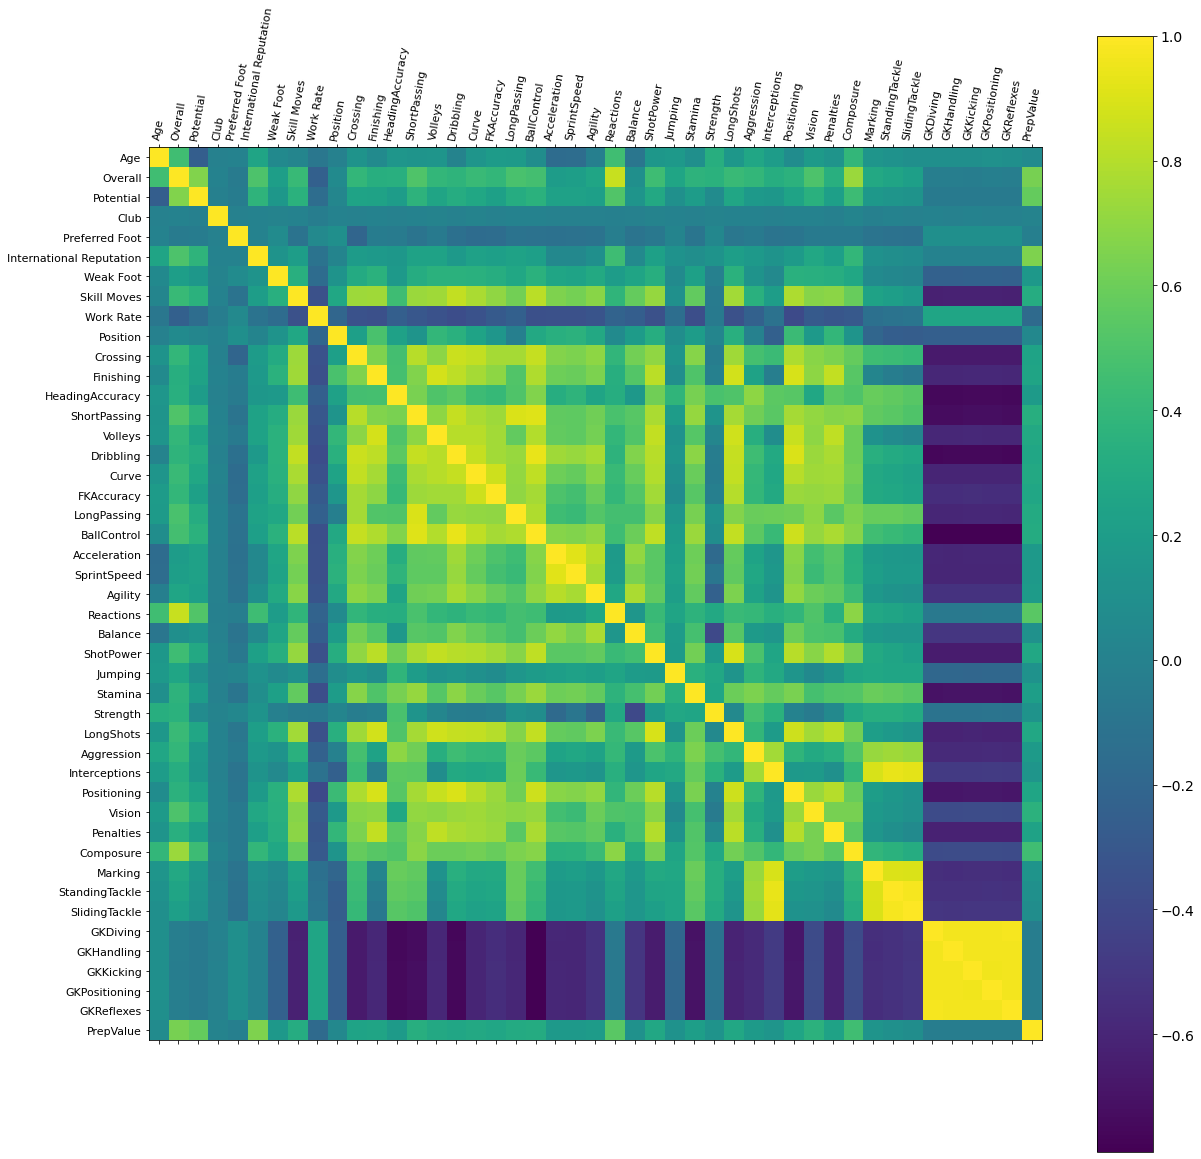

In [32]:
f = plt.figure(figsize=(20, 20))
plt.matshow(data_prep.corr(), fignum=f.number)
plt.xticks(range(data_prep.shape[1]), data_prep.columns, fontsize=11, rotation=80)
plt.yticks(range(data_prep.shape[1]), data_prep.columns, fontsize=11)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

## Создадим второй экземпляр выборки без клуба

In [33]:
data_prep_without_clubs = data_prep.drop(columns=['Club'])

## Еще посмотрим на распределения по признакам

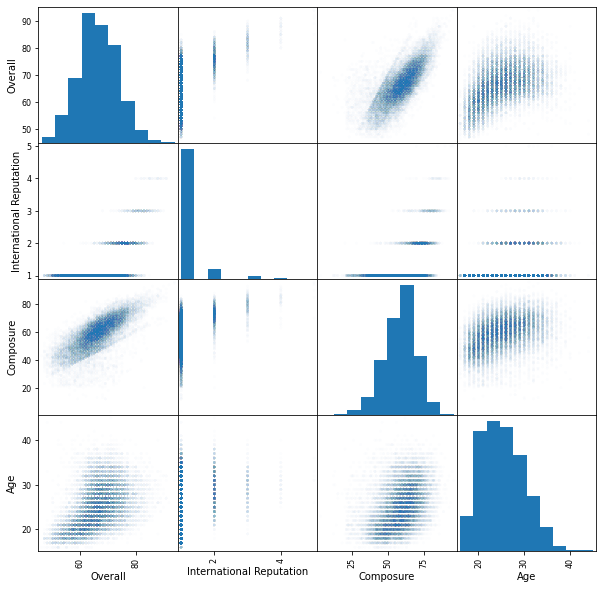

In [34]:
from pandas.plotting import scatter_matrix
scatter_matrix(data_prep[['Overall','International Reputation','Composure','Age']], alpha = .01, figsize = (10, 10))
pass

## Тут тоже все достаточно ожидаемо: высокая мировая популярность в промежуток от 25 до 35, чем спокойнее игрок, тем выше его рейтинг, максимальный рейтинг тоже по большей части достигается в период от 25 до 35 лет.

## Нормализация признаков нам не требуется, так как рейтинг сам по себе предполагает нормализацию

## Разделим итоговую стоимость по классам заработка

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
Y = data_prep['PrepValue'].to_numpy()
X = data_prep.drop(columns=['PrepValue']).to_numpy()

## Разделим выборки признаков и предиката на тестовую и трейновые, а также Разделим Y на 7 достаточно несбалансированных классов

In [36]:
Y_classed = []
for i in Y:
    if i < 0.1:
        Y_classed.append(1)
    if i < 0.5 and i >=0.1:
        Y_classed.append(2)
    if i < 1 and i >=0.5:
        Y_classed.append(3)
    if i < 5 and i >=1:
        Y_classed.append(4)
    if i < 10 and i >=5:
        Y_classed.append(5)
    if i < 30 and i >=10:
        Y_classed.append(6)
    if i >=30:
        Y_classed.append(7)

In [37]:
Y_classed = np.array(Y_classed)

In [38]:
Y_classed.shape

(17918,)

In [39]:
np.unique(Y_classed, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7]),
 array([ 801, 5878, 4392, 4509, 1377,  815,  146]))

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classed, test_size = 0.3, 
                                                    random_state = 7)

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
np.mean(y_test  != y_test_predict)

0.41592261904761907

In [42]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.4049593366289268 15


In [43]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.3406952639132515 0.41908482142857145


## Получили очень высокую ошибку на тесте

In [44]:
print(confusion_matrix(y_test, knn.predict(X_test)))

[[  39  199   12    3    0    0    0]
 [  16 1410  280   57    0    0    0]
 [   0  442  677  235    2    0    0]
 [   0   48  351  877   36    3    0]
 [   0    0    7  319   65   18    0]
 [   0    0    0   90   94   52    2]
 [   0    0    0    2   10   27    3]]


## По confusion matrix большой разброс по классам

In [45]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

0.5752671025354807 0.5876116071428571


/home/tocehka/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Так как у нас достаточно много признаков, то вместо обычного метода опорных векторов используем линейный классификатор, но результат получаем ужасный даже для трейна.

## В таком случае обычные классификаторы для нам не подходят ИЗ-ЗА МУЛЬТИКЛАССОВОСТИ и попробуем рандом форест

In [46]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.08444940476190477


## Ошибку на тесте сократили до 8%

In [47]:
X_without_club = data_prep_without_clubs.drop(columns=['PrepValue']).to_numpy()

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_without_club, Y_classed, test_size = 0.3, 
                                                    random_state = 7)

In [49]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

0.0 0.08426339285714286


## Рассмотрим выборку без клубов. Результат почти не изменился, следовательно многоклассовость признака клуб не влияет на принятие решения

In [50]:
print(confusion_matrix(y_test, rf.predict(X_test)))

[[ 194   57    1    1    0    0    0]
 [   5 1694   56    8    0    0    0]
 [   0   54 1236   65    1    0    0]
 [   0    0   69 1217   25    4    0]
 [   0    0    0   42  346   21    0]
 [   0    0    0    0   36  198    4]
 [   0    0    0    0    0    4   38]]


## По confusion matrix тоже сильно подтянули предсказание, разброс по классам во много раз меньше

# Применение PCA для набора данных Fifa19 и тестирование разных классификаторов 

In [51]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=3, random_state=42)

In [52]:
X_PCA = pca.fit_transform(X)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, Y_classed, test_size = 0.3,random_state = 7)


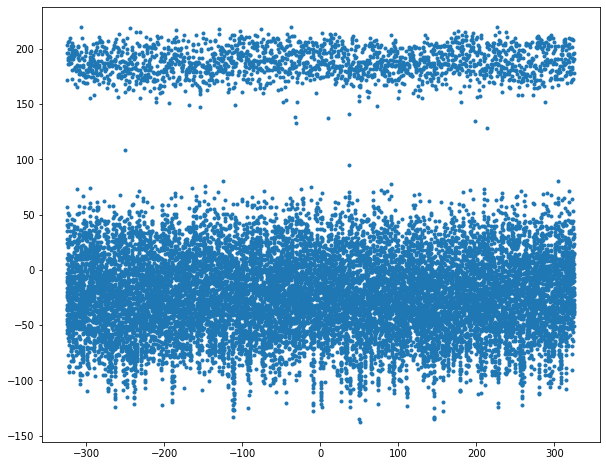

In [53]:
plt.figure(figsize=(10,8))
plt.plot(X_PCA[:,0], X_PCA[:,1], '.') 
plt.show()

In [54]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train_PCA, y_train_PCA)

err_train = np.mean(y_train_PCA != rf.predict(X_train_PCA))
err_test  = np.mean(y_test_PCA != rf.predict(X_test_PCA))

print(err_train, err_test)

0.0 0.421875


In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_PCA, y_train_PCA)
y_test_predict = knn.predict(X_test_PCA)
np.mean(y_test_PCA != y_test_predict)

0.45070684523809523

In [56]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_PCA, y_train_PCA)

err_train = np.mean(y_train_PCA != svc.predict(X_train_PCA))
err_test  = np.mean(y_test_PCA  != svc.predict(X_test_PCA))

print(err_train, err_test)

0.7245255940041461 0.7388392857142857


/home/tocehka/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Как можно заметить, PCA для этого набора данных не подходит, так как данные плохо поддаются обобщению, вероятно, это связано с большим разбросом по показателям рейтинга и большим количеством признаков. Из графика выше мы получаем четких два кластера в двумерном пространстве, однако такое сокращение размерности лишь значительно увеличивает ошибку для каждого классификатора.

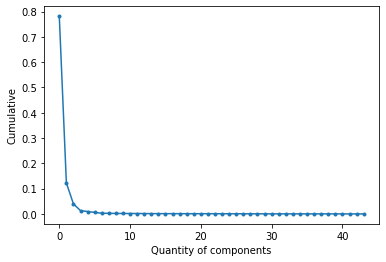

In [57]:
pca = PCA().fit(X)
plt.plot(pca.explained_variance_ratio_, '.-')
plt.xlabel('Quantity of components')
plt.ylabel('Cumulative');

### Рассмотрим 2,3 и 4 компоненты, так как брать больше смысла не имеет, график показывает коэффициент дисперсии, получили почти "идеальную" гиперболическую функцию без резких переходов, после 5 компоненты нет смысла рассматривать использование PCA

In [58]:
test_err = []
for components in [2, 3, 4]:
    pca = PCA(n_components=components, random_state=42)
    X_PCA = pca.fit_transform(X)
    X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, Y_classed, test_size = 0.3, random_state = 7)
    
    knn = KNeighborsClassifier(n_neighbors = 15)
    knn.fit(X_train_PCA, y_train_PCA)
    knn_err = np.mean(y_test_PCA != knn.predict(X_test_PCA))
    
    svc = LinearSVC()
    svc.fit(X_train_PCA, y_train_PCA)
    svm_err = np.mean(y_test_PCA  != svc.predict(X_test_PCA))
    
    rf = ensemble.RandomForestClassifier(n_estimators = 1000)
    rf.fit(X_train_PCA, y_train_PCA)
    rf_err = np.mean(y_test_PCA != rf.predict(X_test_PCA))
    
    test_err.append({"components":components,"knn_err":knn_err,"svm_err":svm_err,"rf_err":rf_err})

/home/tocehka/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tocehka/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/tocehka/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


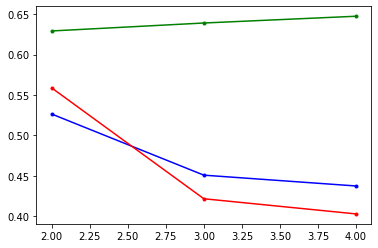

In [59]:
plt.plot([i["components"] for i in test_err], [i["knn_err"] for i in test_err], '.-', color = "blue")
plt.plot([i["components"] for i in test_err], [i["svm_err"] for i in test_err], '.-', color = "green")
plt.plot([i["components"] for i in test_err], [i["rf_err"] for i in test_err], '.-', color = "red")

### Ошибки на тестовой выборке с использованием PCA говорят сами за себя. По сравнению с предыдущим лучшим результатом с использованием RandomForest ошибка увеличилась на более, чем 32%. SVM вообще показывает рекордно пугающую ошибку >70%.

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classed, test_size = 0.26,random_state = 33)

&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;&shy;

## Попробуем обучить нейронную сеть на нашем датасете с использованием 1, 2 и 3х слоев с разным количеством нейронов на каждом, а также подберем оптимальный параметр регуляризации альфа и исследуем полученные результаты

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(alpha=0.0005,hidden_layer_sizes = (100,50,8,), solver = 'adam', 
                          activation = 'logistic',max_iter = 300, random_state = 33)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.3231012896900219 0.3314015883236746


### Попробовали случайный параметр альфа и подобрали случайным образом слои и количество нейронов, получили не самый хороший результат, тем более по сравнению со случайным лесом и 8% ошибки на тесте.
### Однако, солвер и функция активации подобраны не случайно: логистическая - из-за мультиклассовости, а солвер адам, основанный на стохастической градинетной оптимизации показал лучшие результаты (я пробовал все солверы и функции активации)

In [63]:
alpha_arr = np.logspace(-10, 2, 40)
alpha_arr

array([1.00000000e-10, 2.03091762e-10, 4.12462638e-10, 8.37677640e-10,
       1.70125428e-09, 3.45510729e-09, 7.01703829e-09, 1.42510267e-08,
       2.89426612e-08, 5.87801607e-08, 1.19377664e-07, 2.42446202e-07,
       4.92388263e-07, 1.00000000e-06, 2.03091762e-06, 4.12462638e-06,
       8.37677640e-06, 1.70125428e-05, 3.45510729e-05, 7.01703829e-05,
       1.42510267e-04, 2.89426612e-04, 5.87801607e-04, 1.19377664e-03,
       2.42446202e-03, 4.92388263e-03, 1.00000000e-02, 2.03091762e-02,
       4.12462638e-02, 8.37677640e-02, 1.70125428e-01, 3.45510729e-01,
       7.01703829e-01, 1.42510267e+00, 2.89426612e+00, 5.87801607e+00,
       1.19377664e+01, 2.42446202e+01, 4.92388263e+01, 1.00000000e+02])

### Создадим пространство значений альфа и будет поочереди подбирать в поиске оптимального из данного массива

In [64]:
test_err = []
train_err = []

In [65]:
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha,hidden_layer_sizes = (200,), solver = 'adam', 
                          activation = 'logistic', max_iter = 400, random_state = 33)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print("Alpha: {}".format(alpha))
    print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Alpha: 1e-10
0.25937099328757823 0.31702081991843745
Alpha: 2.030917620904739e-10
0.2836563843427106 0.32260141661300706
Alpha: 4.124626382901348e-10
0.30914850290368806 0.3517922300922945
Alpha: 8.376776400682924e-10
0.29730748925258316 0.3382700150246834
Alpha: 1.7012542798525856e-09
0.2574854815596953 0.3118694998926808
Alpha: 3.4551072945922183e-09
0.2595218342258089 0.31380124490233957
Alpha: 7.017038286703837e-09
0.2743796666415265 0.3260356299635115
Alpha: 1.4251026703029992e-08
0.23629232973829098 0.2897617514488088
Alpha: 2.8942661247167517e-08
0.2967795459687759 0.3468555484009444
Alpha: 5.878016072274912e-08
0.2748321894562184 0.3065035415325177
Alpha: 1.1937766417144357e-07
0.29542197752470023 0.34406525005365957
Alpha: 2.424462017082331e-07
0.30153103552304095 0.3419188667095943
Alpha: 4.923882631706742e-07
0.27913115619579154 0.3159476282464048
Alpha: 1e-06
0.2638962214344973 0.3107963082206482
Alpha: 2.030917620904739e-06
0.25680669733765743 0.3165915432496244
Alpha: 4.1

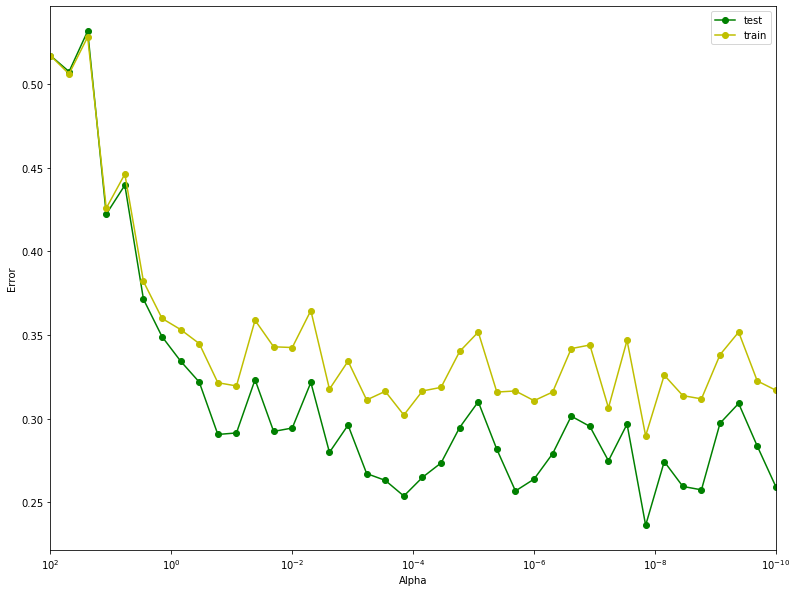

In [66]:
plt.figure(figsize=(13,10))
plt.semilogx(alpha_arr, train_err, 'g-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'y-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

In [67]:
alpha_best = alpha_arr[7]

### Получили лучший параметр альфа = 1.4251026703029992e-08

In [68]:
test_err = []
train_err = []

In [69]:
layers = np.linspace(50,300,6)
layers = np.array(layers).astype("int")
layers

array([ 50, 100, 150, 200, 250, 300])

### Теперь будем подбирать количество нейронов на 1, 2 и 3-ем слое, эмпирически создавая пространство нейронов

In [70]:
for neurons in layers:
    mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (neurons,), solver = 'adam', 
                          activation = 'logistic',max_iter = 500, random_state = 33)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print("Neurons number: {}".format(neurons))
    print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Neurons number: 50
0.3032657063126933 0.33247477999570724
Neurons number: 100
0.29067048797043515 0.3247477999570723
Neurons number: 150
0.2908213289086658 0.32324533161622665
Neurons number: 200
0.23629232973829098 0.2897617514488088
Neurons number: 250
0.2957990798702768 0.3266795449667311
Neurons number: 300
0.2596726751640395 0.31015239321742866


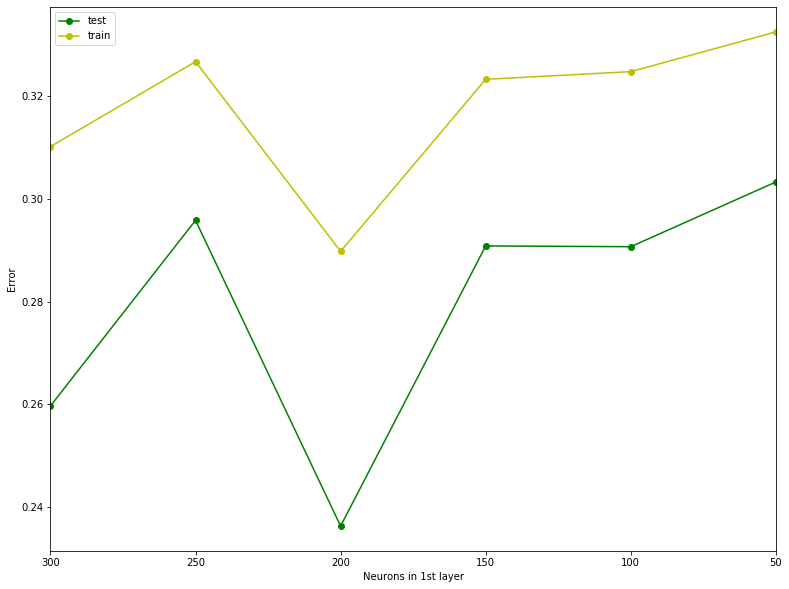

In [71]:
plt.figure(figsize=(13,10))
plt.plot(layers, train_err, 'g-o', label = 'test')
plt.plot(layers, test_err, 'y-o', label = 'train')
plt.xlim([np.max(layers), np.min(layers)])
plt.xlabel('Neurons in 1st layer')
plt.ylabel('Error')
plt.legend()
pass

In [72]:
best_frst_neurons = layers[3]

In [73]:
test_err = []
train_err = []

In [74]:
second_layer = np.linspace(100,220,12)
second_layer = np.array(second_layer).astype("int")
second_layer

array([100, 110, 121, 132, 143, 154, 165, 176, 187, 198, 209, 220])

In [75]:
for neurons in second_layer:
    mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (best_frst_neurons, neurons,), solver = 'adam', 
                          activation = 'logistic',max_iter = 500, random_state = 33)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print("Neurons number: {}".format(neurons))
    print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Neurons number: 100
0.29067048797043515 0.32625026829791803
Neurons number: 110
0.3310958594162456 0.3547971667739858
Neurons number: 121
0.24934007089524096 0.2940545181369393
Neurons number: 132
0.2751338713326797 0.3148744365743722
Neurons number: 143
0.2777735877517158 0.31444515990555916
Neurons number: 154
0.3016064559921563 0.3266795449667311
Neurons number: 165
0.25522286748623574 0.3073620948701438
Neurons number: 176
0.34912135153480656 0.3734707018673535
Neurons number: 187
0.31812353872841087 0.3449238033912857
Neurons number: 198
0.3313221208235915 0.35587035844601844
Neurons number: 209
0.2760389169620635 0.3105816698862417
Neurons number: 220
0.2608039822007693 0.29727409315303716


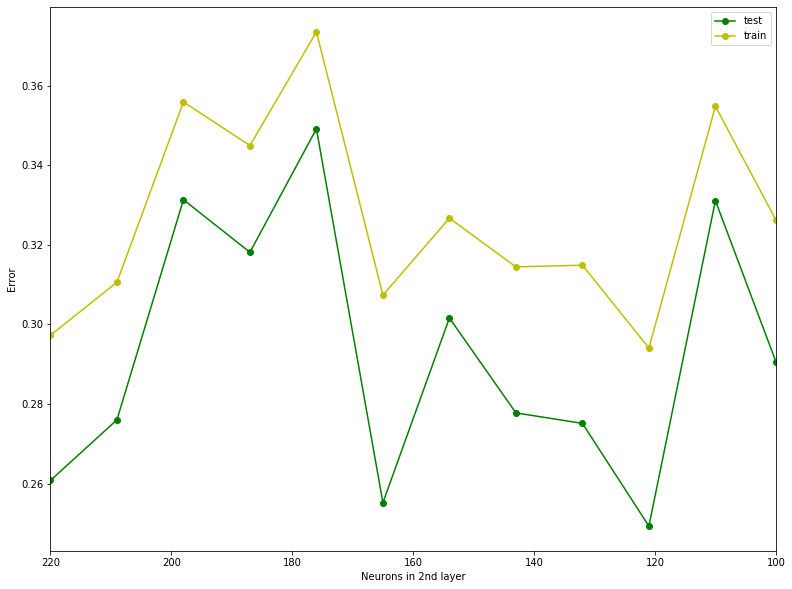

In [76]:
plt.figure(figsize=(13,10))
plt.plot(second_layer, train_err, 'g-o', label = 'test')
plt.plot(second_layer, test_err, 'y-o', label = 'train')
plt.xlim([np.max(second_layer), np.min(second_layer)])
plt.xlabel('Neurons in 2nd layer')
plt.ylabel('Error')
plt.legend()
pass

In [77]:
best_scnd_neurons = second_layer[2]

In [78]:
test_err = []
train_err = []
third_layer = np.linspace(50,150,11)
third_layer = np.array(third_layer).astype("int")
third_layer

array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150])

In [79]:
for neurons in third_layer:
    mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (best_frst_neurons, best_scnd_neurons, neurons,), solver = 'adam', 
                          activation = 'logistic',max_iter = 500, random_state = 33)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    print("Neurons number: {}".format(neurons))
    print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

Neurons number: 50
0.2966287050305453 0.3198111182657223
Neurons number: 60
0.28395806621917186 0.321742863275381
Neurons number: 70
0.31397541292706843 0.33547971667739857
Neurons number: 80
0.3540991024964175 0.3749731702081992
Neurons number: 90
0.23169168112225658 0.2567074479502039
Neurons number: 100
0.28682404404555395 0.32753809830435715
Neurons number: 110
0.2962516026849687 0.33118694998926806
Neurons number: 120
0.31706765216079646 0.3432066967160335
Neurons number: 130
0.286597782638208 0.31444515990555916
Neurons number: 140
0.29632702315408405 0.32689418330113756
Neurons number: 150
0.27626517836940945 0.2996351148315089


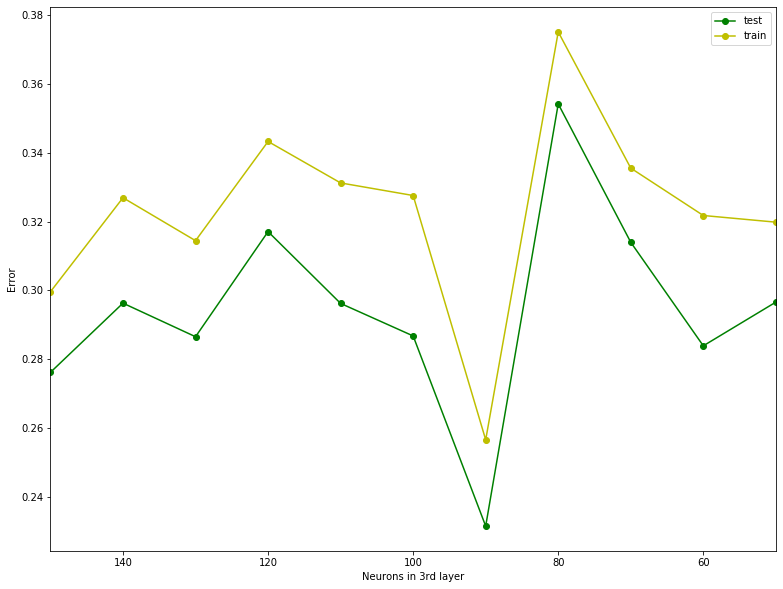

In [80]:
plt.figure(figsize=(13,10))
plt.plot(third_layer, train_err, 'g-o', label = 'test')
plt.plot(third_layer, test_err, 'y-o', label = 'train')
plt.xlim([np.max(third_layer), np.min(third_layer)])
plt.xlabel('Neurons in 3rd layer')
plt.ylabel('Error')
plt.legend()
pass

In [81]:
best_third_neurons = third_layer[4]

In [82]:
mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (best_frst_neurons, best_scnd_neurons, best_third_neurons,), solver = 'adam', 
                          activation = 'logistic',max_iter = 500, random_state = 33)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.23169168112225658 0.2567074479502039


### Получили не самый хороший, но, пожалуй, лучший результат с подбираемыми параметрами. 25.7% ошибка на тесте. Помимо этого, классификация с использованием нейронной сети превосходит kNN и Linear Regression.

In [83]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 117   23    0    0    0    0    0]
 [  96 1278  134    2    0    0    0]
 [   1  226  756  182    0    0    0]
 [   0    2  216  935  121    3    0]
 [   0    0    0   78  218   58    0]
 [   0    0    0    1   25  149   22]
 [   0    0    0    0    0    6   10]]


### Страшного разброса по классам тоже не наблюдается, ошибка в определении стоимости игрока явно видна в пределах ближайших классов от исходного

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.84      0.55      0.66       214
           2       0.85      0.84      0.84      1529
           3       0.65      0.68      0.67      1106
           4       0.73      0.78      0.76      1198
           5       0.62      0.60      0.61       364
           6       0.76      0.69      0.72       216
           7       0.62      0.31      0.42        32

    accuracy                           0.74      4659
   macro avg       0.72      0.64      0.67      4659
weighted avg       0.75      0.74      0.74      4659



## По поводу переобучения и недообучения: Недообучение происходит, это факт, но тестировать абсолютно все параметры, подбирая лучшие, довольно сложная задача в плане времени и ресурсов. Еще недообучение явно выражается при подборе параметра регуляризации, начиная с целых значений > 2. Ошибка растет как на трейне, так и на тесте. Ни разу ошибка на трейне не была 0 => нейронной сети не хватает каких-то параметров или слоев, чтобы дообучать модель на 7 классов с количеством признаков > 40 (после полной чистки я не помню точно, сколько их).

In [85]:
pca = PCA(n_components=3, random_state=33)
X_PCA = pca.fit_transform(X)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, Y_classed, test_size = 0.28,random_state = 33)

## Попробуем применить метод сокращения размерности при обучение с помощью нейронной сети. Однако, в прошлый раз уже было установлено, что для данного датасета он не подходит, следовательно, хороших результатов ждать не стоит.

In [86]:
mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (best_frst_neurons, best_scnd_neurons, best_third_neurons,), solver = 'adam', 
                          activation = 'logistic', max_iter = 500, random_state = 33)
mlp_model.fit(X_train_PCA, y_train_PCA)

y_train_pred = mlp_model.predict(X_train_PCA)
y_test_pred = mlp_model.predict(X_test_PCA)

print(np.mean(y_train_PCA != y_train_pred), np.mean(y_test_PCA != y_test_pred))

0.3851162790697674 0.3987644479872459


In [87]:
pca = PCA(n_components=2, random_state=33)
X_PCA = pca.fit_transform(X)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, Y_classed, test_size = 0.28,random_state = 33)

In [88]:
mlp_model = MLPClassifier(alpha=alpha_best,hidden_layer_sizes = (best_frst_neurons, best_scnd_neurons, best_third_neurons,), solver = 'adam', 
                          activation = 'logistic', max_iter = 500, random_state = 33)
mlp_model.fit(X_train_PCA, y_train_PCA)

y_train_pred = mlp_model.predict(X_train_PCA)
y_test_pred = mlp_model.predict(X_test_PCA)

print(np.mean(y_train_PCA != y_train_pred), np.mean(y_test_PCA != y_test_pred))

0.503953488372093 0.502989238740534


In [89]:
alpha_arr = np.logspace(-10, 1, 10)
alpha_arr

array([1.00000000e-10, 1.66810054e-09, 2.78255940e-08, 4.64158883e-07,
       7.74263683e-06, 1.29154967e-04, 2.15443469e-03, 3.59381366e-02,
       5.99484250e-01, 1.00000000e+01])

### Попробуем обучить при разных параметрах регуляризации. Пространство создадим небольшое, 10 элементов вполне достаточно, чтобы посмотреть на ошибку и сравнить ее с обучением без PCA.

In [90]:
test_err = []
train_err = []

In [95]:
pca = PCA(n_components=4, random_state=33)
X_PCA = pca.fit_transform(X)
X_train_PCA, X_test_PCA, y_train_PCA, y_test_PCA = train_test_split(X_PCA, Y_classed, test_size = 0.28,random_state = 33)

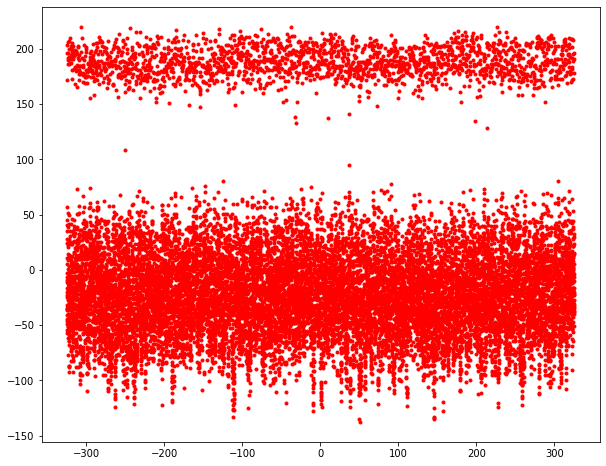

In [99]:
plt.figure(figsize=(10,8))
plt.plot(X_PCA[:,0], X_PCA[:,1], '.r') 
plt.show()

In [98]:
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha=alpha,hidden_layer_sizes = (200,), solver = 'adam', 
                          activation = 'logistic', max_iter = 400, random_state = 33)
    mlp_model.fit(X_train_PCA, y_train_PCA)

    y_train_pred = mlp_model.predict(X_train_PCA)
    y_test_pred = mlp_model.predict(X_test_PCA)
    train_err.append(np.mean(y_train_PCA != y_train_pred))
    test_err.append(np.mean(y_test_PCA != y_test_pred))
    print("Alpha: {}".format(alpha))
    print(np.mean(y_train_PCA != y_train_pred), np.mean(y_test_PCA != y_test_pred))

Alpha: 1e-10
0.344031007751938 0.3860103626943005
Alpha: 1.6681005372000556e-09
0.344031007751938 0.3860103626943005
Alpha: 2.782559402207126e-08
0.344031007751938 0.3860103626943005
Alpha: 4.641588833612782e-07
0.344031007751938 0.3860103626943005
Alpha: 7.742636826811277e-06
0.344031007751938 0.3860103626943005
Alpha: 0.00012915496650148855
0.34410852713178297 0.3860103626943005
Alpha: 0.002154434690031887
0.342093023255814 0.3788361897170187
Alpha: 0.0359381366380464
0.35 0.3872060581905141
Alpha: 0.5994842503189421
0.37248062015503874 0.3931845356715823
Alpha: 10.0
0.44813953488372094 0.44878437624551615


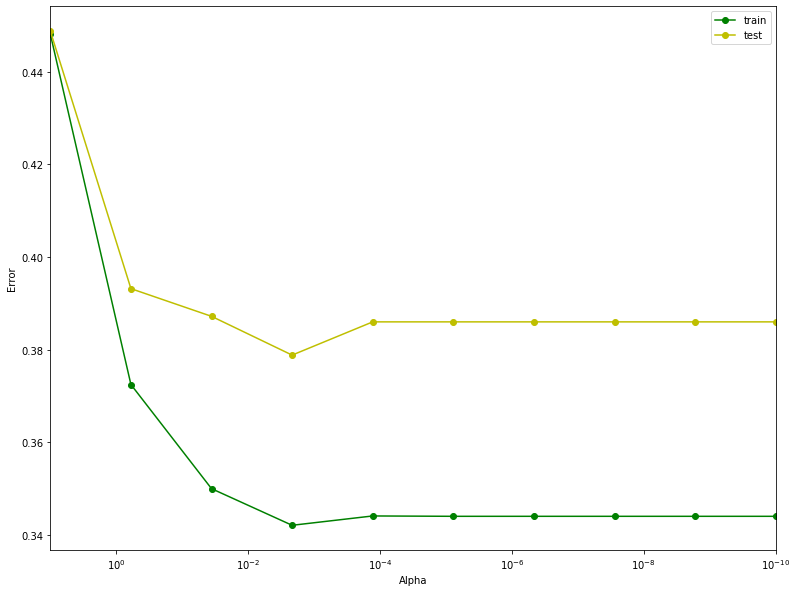

In [103]:
plt.figure(figsize=(13,10))
plt.semilogx(alpha_arr, train_err[32:], 'g-o', label = 'train')
plt.semilogx(alpha_arr, test_err[32:], 'y-o', label = 'test')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.xlabel('Alpha')
plt.ylabel('Error')
plt.legend()
pass

## Как видим, сокращение размерности опять ухудшило обучение классификатора. Ошибка как на тесте, так и на трейне, возросла по сравнению с обучением на выборке без PCA. Дальнейшее исследование с использованием PCA проводить нет резона.

# Попробуем использовать кластеризацию над данным датасетом

In [81]:
from sklearn.cluster import KMeans, DBSCAN, AffinityPropagation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

### Переопределим классы начиная с нуля, так как в предыдущей реализации они инициаизировались как 1-7, а KMeans выдает классы начиная с 0

In [115]:
Y_classed = []
for i in Y:
    if i < 0.1:
        Y_classed.append(0)
    if i < 0.5 and i >=0.1:
        Y_classed.append(1)
    if i < 1 and i >=0.5:
        Y_classed.append(2)
    if i < 5 and i >=1:
        Y_classed.append(3)
    if i < 10 and i >=5:
        Y_classed.append(4)
    if i < 30 and i >=10:
        Y_classed.append(5)
    if i >=30:
        Y_classed.append(6)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classed, test_size = 0.3, 
                                                    random_state = 7)

In [125]:
model = KMeans(n_clusters=7)
model.fit(X_train)
y_test_predict = model.predict(X_test)

In [126]:
y_test_predict

array([6, 2, 6, ..., 1, 3, 3], dtype=int32)

In [127]:
np.mean(y_test != y_test_predict)

0.8402157738095238

In [129]:
for i in range(0,10):
    model = KMeans(n_clusters=7)
    model.fit(X_train)
    y_test_predict = model.predict(X_test)
    print(np.mean(y_test != y_test_predict))

0.8312872023809523
0.8612351190476191
0.8485863095238095
0.8498883928571429
0.8262648809523809
0.8608630952380952
0.8571428571428571
0.8601190476190477
0.8377976190476191
0.8712797619047619


### Можно заметить, что кластеризовать данные из датасета достаточно сложная задача, и ошибка всегда выше 80, однако она каждый раз разная, стоит попробывать подобрать параметры жадным поиском

In [130]:
print(confusion_matrix(y_test_predict, y_test))

[[ 37 339 238 202  68  33   4]
 [ 31 297 264 249  65  43  10]
 [ 18 271 252 263  98  57  10]
 [ 37 131  61  43  16   8   1]
 [ 48 147  52  50  16   6   3]
 [ 41 268 231 264  82  38   5]
 [ 41 310 258 244  64  53   9]]


### Матрица рассредоточения тоже ничего путнего не показывает, кластеризация "разамазала" данные абсолютно по всем классам

In [132]:
param = {"init":["random", "k-means++"],
         "max_iter":[350,450],
         "tol": [1e-4,1e-3,1e-2],
         "algorithm": ["auto", "full","elkan"]}
model = KMeans(n_clusters=7)
grid_model = GridSearchCV(model, param_grid = param, n_jobs=2, verbose=True)
grid_model.fit(X_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/home/tocehka/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.0s
[Parallel(n_jobs=2)]: Done 108 out of 108 | elapsed:   45.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KMeans(algorithm='auto', copy_x=True, init='k-means++',
                              max_iter=300, n_clusters=7, n_init=10,
                              n_jobs=None, precompute_distances='auto',
                              random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=2,
             param_grid={'algorithm': ['auto', 'full', 'elkan'],
                         'init': ['random', 'k-means++'],
                         'max_iter': [350, 450], 'tol': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=True)

In [133]:
y_test_predict = grid_model.predict(X_test)
np.mean(y_test != y_test_predict)

0.8264508928571429

### Ошибка 82.64%, на самом деле можно делать вывод о датасете, что кластеризацией невозможно добиться точного результата определения классов, так как большое количество разнородных признаков

In [137]:
model = DBSCAN()
predicts = model.fit_predict(X_train)
#np.mean(y_test != y_test_predict)
np.unique(predicts)

array([-1])

### Метод DBSCAN утверждает, что весь датасет - шум, так как в предиктах выдается -1, что означает в данной реализации просто шум

In [138]:
model = AffinityPropagation()
predicts = model.fit_predict(X_train)
np.unique(predicts)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138])

### AffinityPropagation разделяет данные на очень большое количество классов

In [141]:
uniq, cnt = np.unique(predicts,return_counts=True)

In [142]:
cnt

array([ 80, 104,  88, 108,  90,  44,  56,  74, 126,  62,  52,  99,  59,
        99,  81,  72,  83, 110,  69, 140,  77,  82,  55,  64, 132,  71,
        78, 119,  97, 101, 104,  49, 117,  90,  56,  85,  95, 106, 101,
       115, 119,  79, 103,  87, 116,  53,  90,  99,  59, 110,  56,  89,
        74, 105,  64,  75,  66,  73,  65, 107,  83,  91,  93, 129, 128,
        65,  83, 116,  74,  80,  84, 171,  76, 135,  75,  91,  90,  75,
       101,  58, 123, 114,  49, 100, 100, 120,  81, 136,  79,  79, 105,
        89,  38, 151,  85, 155, 101,  71, 106,  41,  88, 125, 128,  90,
       112, 114,  83,  81,  94,  89,  85,  49, 102,  82,  93, 108,  81,
        81, 113,  77,  97,  44,  61,  88,  94, 127, 151,  39, 145,  73,
       156,  99,  77,  44,  74,  65,  59,  82,  92])

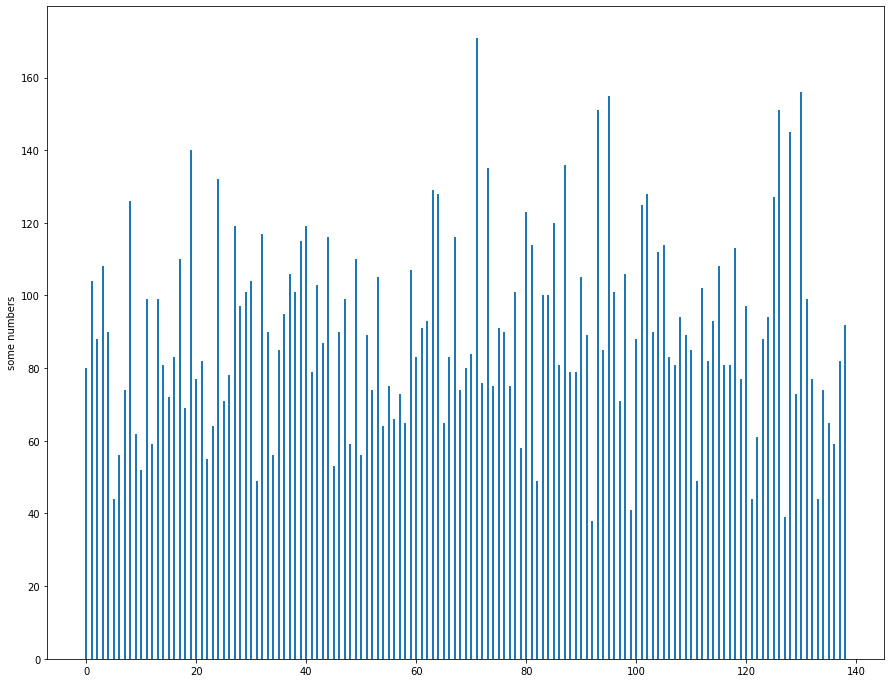

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
width = 0.35
plt.bar(np.arange(len(cnt)),cnt,width)
plt.ylabel('some numbers')
plt.show()

### Данные не распределены явно, какие либо предположения о правильности кластеризации производить сложно

# Далее обучим два классификатора: Random Forest and Gradient Boosting. Они же показали самые лучшие результаты для нашего датасета с 7 классами

In [47]:
from sklearn import ensemble
from sklearn.feature_selection import SelectFromModel

## Попробуем 5 вариаций количества деревьев и посмотрим на ошибку. Ошибка на тестовых данных самой низкой оказалась при 750 деревьях. А при 1000 уже, пошло небольшое переобучение. Однако это может быть субъективное мнение, так как я переобучал несколько раз классификатор, чтобы отладить код, но каждый раз ошибка на разных количествах была разной, но варьировалась на ~0.005, в целом обучение просиходит полностью, судя по ошибке на обучающей выборке, на тесте же ошибка не большая, различия при разном количестве деревьев крайне низкие. В том числе можно просмотреть на out of bag ошибку, которая нам показывает среднее из всех ошибок на каждой эпохе - то есть дереве.

Train error: 0.0, test error: 0.08779761904761904, OOB error: 0.0957582522723649
Train error: 0.0, test error: 0.08649553571428571, OOB error: 0.0912932546643278
Train error: 0.0, test error: 0.08686755952380952, OOB error: 0.08945941636102694
Train error: 0.0, test error: 0.08482142857142858, OOB error: 0.08834316695901767
Train error: 0.0, test error: 0.08519345238095238, OOB error: 0.08818370275873066


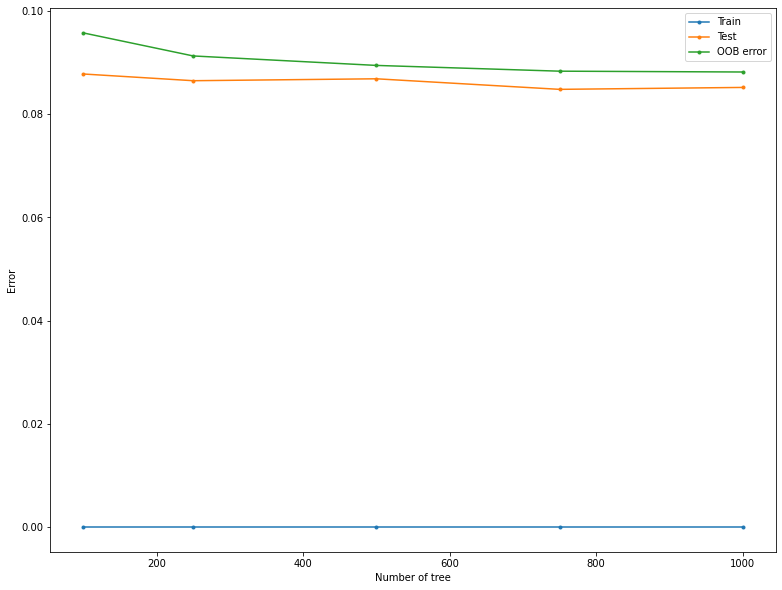

In [67]:
param_list = [100, 250, 500, 750, 1000]
err_list = []
selected_features = {}
for tree_num in param_list:
    rf = ensemble.RandomForestClassifier(n_estimators = tree_num, oob_score=True)
    rf.fit(X_train, y_train)
    train_err = np.mean(y_train != rf.predict(X_train))
    test_err = np.mean(y_test  != rf.predict(X_test))
    features = SelectFromModel(rf, prefit=True)
    selected_features[tree_num] = features.get_support()
    err_list.append((train_err, test_err, 1-rf.oob_score_))
    print(f"Train error: {train_err}, test error: {test_err}, OOB error: {1-rf.oob_score_}")
plt.figure(figsize=(13,10))
ax = plt.subplot(111)
plot_list = []
plot, = ax.plot(param_list, [err[0] for err in err_list], ".-")
plot_list.append(plot)
plot, = ax.plot(param_list, [err[1] for err in err_list], ".-")
plot_list.append(plot)
plot, = ax.plot(param_list, [err[2] for err in err_list], ".-")
plot_list.append(plot)
plt.xlabel("Number of tree")
plt.ylabel("Error")
plt.legend(plot_list, ["Train", "Test", "OOB error"])

## Вспомним, как выглядят наши данные, и найдем самые значимые признаки на каждом этапе обучения.

In [68]:
cmp_data = data_prep.drop(columns=['PrepValue'])
cmp_data

,Age,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,212,0,5.0,4.0,4.0,8,21,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,326,1,5.0,4.0,5.0,1,26,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,435,1,5.0,5.0,5.0,2,14,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,375,1,4.0,3.0,1.0,8,5,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,374,1,4.0,5.0,4.0,0,19,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,19,47,65,165,1,1.0,2.0,2.0,8,4,...,43.0,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0
18203,19,47,63,587,1,1.0,2.0,2.0,8,26,...,43.0,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0
18204,16,47,67,122,1,1.0,3.0,2.0,8,26,...,55.0,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0
18205,17,47,66,586,1,1.0,3.0,2.0,8,24,...,50.0,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0


## Модель вывела для себя 8-9 наиболее значимых признаков из 44 всего.
### Признаки, кстати, которая выделила для себя модель как решающие, крайне логичные и для нас - людей: возраст, рейтинг в мире, потенциал игрока, а также основные футбольно-физические показатели.

In [78]:
labels = list(cmp_data.columns)
for tree_num in param_list:
    print([labels[i] for i in range(0, len(selected_features[tree_num])) if selected_features[tree_num][i]])

['Age', 'Overall', 'Potential', 'ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure', 'StandingTackle']
['Age', 'Overall', 'Potential', 'Dribbling', 'BallControl', 'Reactions', 'Composure', 'StandingTackle']
['Age', 'Overall', 'Potential', 'ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure', 'StandingTackle']
['Age', 'Overall', 'Potential', 'ShortPassing', 'Dribbling', 'BallControl', 'Reactions', 'Composure', 'StandingTackle']
['Age', 'Overall', 'Potential', 'Dribbling', 'BallControl', 'Reactions', 'Composure', 'StandingTackle']


## Далее попробуем использовать Градиентный бустинг над деревьями решений с теми же количествами деревьев. Итоговый результат намного улучшился и итоговая ошибка теперь равна 0.036.

Train error: 0.020172221336309998, test error: 0.042782738095238096
Train error: 0.0036676766066018177, test error: 0.03943452380952381
Train error: 0.0, test error: 0.037388392857142856
Train error: 0.0, test error: 0.03813244047619048
Train error: 0.0, test error: 0.03627232142857143


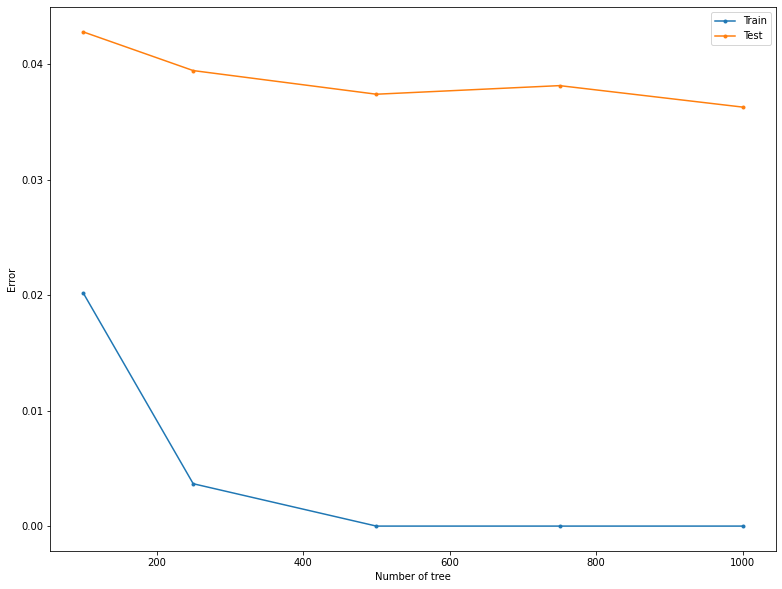

In [85]:
param_list = [100, 250, 500, 750, 1000]
err_list = []
selected_features = {}
oob_scores = []
for tree_num in param_list:
    gbt = ensemble.GradientBoostingClassifier(n_estimators = tree_num, subsample=0.9)
    gbt.fit(X_train, y_train)
    train_err = np.mean(y_train != gbt.predict(X_train))
    test_err = np.mean(y_test  != gbt.predict(X_test))
    features = SelectFromModel(gbt, prefit=True)
    selected_features[tree_num] = features.get_support()
    oob_scores.append(gbt.oob_improvement_)
    err_list.append((train_err, test_err))
    print(f"Train error: {train_err}, test error: {test_err}")
plt.figure(figsize=(13,10))
ax = plt.subplot(111)
plot_list = []
plot, = ax.plot(param_list, [err[0] for err in err_list], ".-")
plot_list.append(plot)
plot, = ax.plot(param_list, [err[1] for err in err_list], ".-")
plot_list.append(plot)
plt.xlabel("Number of tree")
plt.ylabel("Error")
plt.legend(plot_list, ["Train", "Test"])

## Получить среднюю OOB ошибку в GBT нельзя, поэтому выведем score из loss функции GBT на каждое дерево. Таким образом, мы можем смотреть, насколько успешно у нас происходило обучение. (Графики немного смещены специально, чтобы видеть их полностью, на самом же деле все они стремятся к абсолютному нулю)

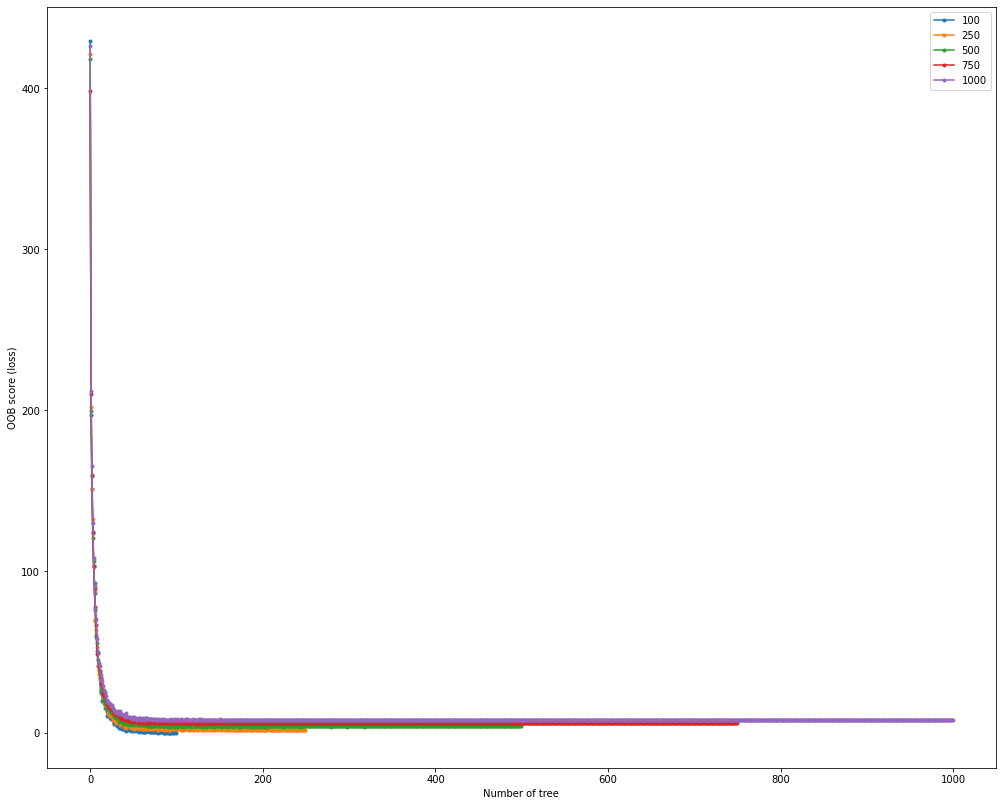

In [99]:
plt.figure(figsize=(17,14))
ax = plt.subplot(111)
plot_list = []
i = 0
for score in oob_scores:
    x = np.arange(len(score))
    plot, = ax.plot(x, score + 2*i, ".-", )
    plot_list.append(plot)
    i+=1
plt.xlabel("Number of tree")
plt.ylabel("OOB score (loss)")
plt.legend(plot_list, param_list)

## GBT еще сократил количество решающих признаков до 3х.

In [100]:
for tree_num in param_list:
    print([labels[i] for i in range(0, len(selected_features[tree_num])) if selected_features[tree_num][i]])

['Age', 'Overall', 'Potential']
['Age', 'Overall', 'Potential']
['Age', 'Overall', 'Potential']
['Age', 'Overall', 'Potential']
['Age', 'Overall', 'Potential']
